In [12]:
%pip install kagglehub
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from prophet import Prophet
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import layers
from statsmodels.tsa.seasonal import seasonal_decompose


In [4]:
# 1) Baixar o Dataset usando kagglehub
path = kagglehub.dataset_download("erogluegemen/airline-passengers")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'airline-passengers' dataset.
Path to dataset files: /kaggle/input/airline-passengers


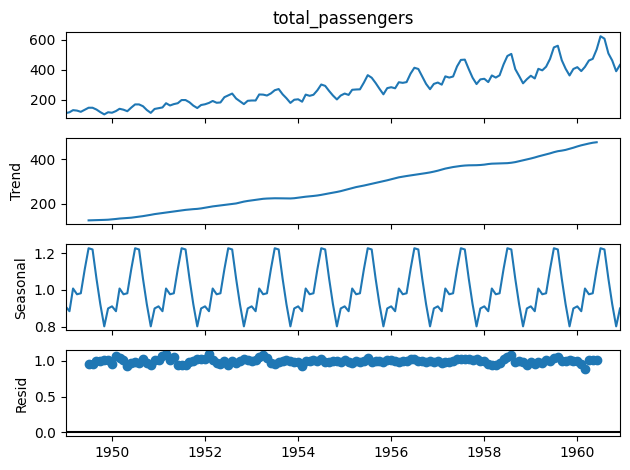

In [13]:
# Decompondo a série temporal para entender a tendência, sazonalidade e erro
decomposition = seasonal_decompose(data['total_passengers'], model='multiplicative', period=12)
decomposition.plot()
plt.show()


In [5]:


# Carregar o dataset e visualizar as primeiras linhas
dataset_path = path + "/airline-passengers.csv"
data = pd.read_csv(dataset_path)
data['month'] = pd.to_datetime(data['month'])
data.set_index('month', inplace=True)

# Visualizar o dataset
data.head()


,total_passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ls20p2i/qi40h_vk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ls20p2i/eby_j7h_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79665', 'data', 'file=/tmp/tmp0ls20p2i/qi40h_vk.json', 'init=/tmp/tmp0ls20p2i/eby_j7h_.json', 'output', 'file=/tmp/tmp0ls20p2i/prophet_model21pt5x6i/prophet_model-20251004182333.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:23:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:23:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/

,ds,yhat,yhat_lower,yhat_upper
144,1960-12-31,462.137049,434.120985,492.741780
145,1961-01-31,454.745809,426.160217,482.822798
146,1961-02-28,499.838795,471.741319,528.177279
147,1961-03-31,488.229829,459.284667,518.616011
148,1961-04-30,499.644227,471.594416,525.905604
149,1961-05-31,533.995217,505.675787,565.780733
150,1961-06-30,577.723970,549.180467,607.595930
151,1961-07-31,576.256291,547.499818,607.115016
152,1961-08-31,530.381179,503.147760,558.315287
153,1961-09-30,493.132049,464.481086,522.276659


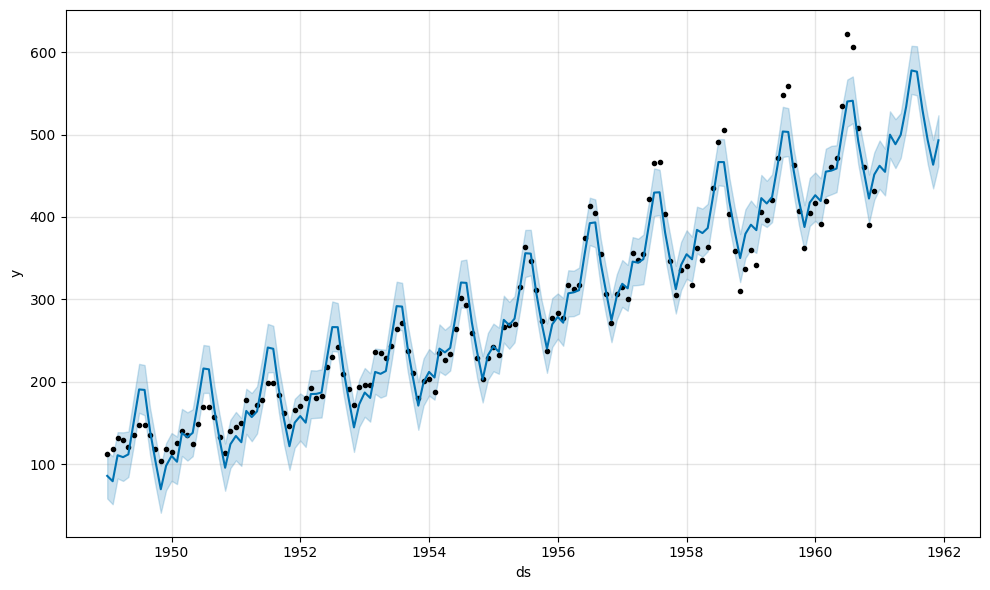

In [7]:
# Ajustando o dataset para o Prophet
prophet_data = data.reset_index()[['month', 'total_passengers']]
prophet_data.columns = ['ds', 'y']

# Criando o modelo Prophet
prophet_model = Prophet()
prophet_model.fit(prophet_data)

# Criando a previsão para os próximos 12 meses
future = prophet_model.make_future_dataframe(periods=12, freq='M')
forecast = prophet_model.predict(future)

# Visualizando a previsão do Prophet
fig = prophet_model.plot(forecast)

# Exibindo as previsões para os próximos 12 meses
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

Epoch 1/150


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - loss: 0.1010 - val_loss: 0.0737
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0127 - val_loss: 0.0421
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0194 - val_loss: 0.0287
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0105 - val_loss: 0.0533
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0123 - val_loss: 0.0372
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0102 - val_loss: 0.0217
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0097 - val_loss: 0.0240
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0087 - val_loss: 0.0241
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0083 - val_loss: 0.0293
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0094 - val_loss: 0.0222
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0079 - val_loss: 0.0223
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0083 - val_loss: 0.0233


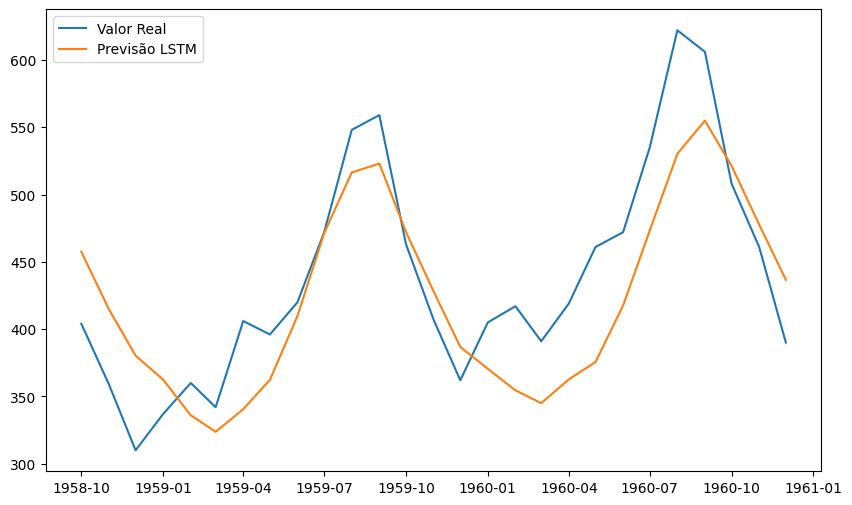

In [14]:
# Normalizando os dados
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['total_passengers']])

# Função para criar o conjunto de dados de treinamento e teste
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

# Definindo o time_step (número de passos temporais que usamos para prever)
time_step = 12  # Usando 12 meses de dados para prever o próximo mês

# Criando o dataset para LSTM
X, y = create_dataset(data_scaled, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Dividindo os dados em treino e teste (80% treino, 20% teste)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Ajustando a arquitetura da rede LSTM
model = keras.Sequential()
model.add(layers.LSTM(units=100, return_sequences=True, input_shape=(time_step, 1)))
model.add(layers.LSTM(units=100, return_sequences=False))
model.add(layers.Dropout(0.2))  # Adicionando Dropout para evitar overfitting
model.add(layers.Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo LSTM com mais épocas
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test))

# Fazendo previsões com o LSTM
y_pred_lstm = model.predict(X_test)

# Invertendo a normalização para obter os valores originais
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
y_test = scaler.inverse_transform([y_test])

# Visualizando os resultados da previsão do LSTM
plt.figure(figsize=(10, 6))
plt.plot(data.index[-len(y_test[0]):], y_test[0], label='Valor Real')
plt.plot(data.index[-len(y_pred_lstm):], y_pred_lstm, label='Previsão LSTM')
plt.legend()
plt.show()


In [15]:
# Calculando as métricas para o modelo Prophet
y_true_prophet = data['total_passengers'][-12:]
y_pred_prophet = forecast['yhat'][-12:]

rmse_prophet = np.sqrt(mean_squared_error(y_true_prophet, y_pred_prophet))
mae_prophet = mean_absolute_error(y_true_prophet, y_pred_prophet)

# Calculando as métricas para o modelo LSTM
rmse_lstm = np.sqrt(mean_squared_error(y_test[0], y_pred_lstm))
mae_lstm = mean_absolute_error(y_test[0], y_pred_lstm)

# Exibindo as métricas
print("Métricas para o modelo Prophet:")
print(f"RMSE: {rmse_prophet:.4f}")
print(f"MAE: {mae_prophet:.4f}")

print("\nMétricas para o modelo LSTM:")
print(f"RMSE: {rmse_lstm:.4f}")
print(f"MAE: {mae_lstm:.4f}")


Métricas para o modelo Prophet:
RMSE: 47.9808
MAE: 42.3758

Métricas para o modelo LSTM:
RMSE: 46.9675
MAE: 40.7522


### **Análise de Desempenho dos Modelos: Prophet vs LSTM**

#### **Métricas de Erro Utilizadas:**

1. **RMSE (Root Mean Squared Error)**:
   - O **RMSE** é uma métrica que penaliza mais os **erros grandes**. Ele calcula a raiz quadrada da média dos quadrados dos erros, tornando-o sensível a grandes desvios. Essa métrica é crucial quando os grandes erros são mais prejudiciais, como no caso de previsões de passageiros de uma companhia aérea, onde erros grandes podem resultar em superlotação de voos ou perdas financeiras. Quanto menor o valor de RMSE, melhor o modelo se sai em evitar grandes desvios.
   - No caso do **Prophet**, o RMSE foi de **47.98**, enquanto o **LSTM** obteve um RMSE ligeiramente melhor de **46.97**. Embora a diferença seja pequena, isso sugere que o **LSTM** consegue lidar um pouco melhor com grandes erros em comparação ao **Prophet**.

2. **MAE (Mean Absolute Error)**:
   - O **MAE** mede o **erro absoluto médio** entre os valores previstos e os reais. Ele não considera a direção do erro, sendo uma métrica mais simples e fácil de interpretar. O MAE não penaliza erros grandes como o RMSE, tornando-o mais robusto em relação a outliers.
   - Neste caso, o **LSTM** também se saiu melhor, com **MAE de 40.75**, enquanto o **Prophet** apresentou um **MAE de 42.38**. Isso significa que, em média, as previsões do **LSTM** foram mais próximas dos valores reais, o que sugere que o modelo **LSTM** tem um desempenho ligeiramente melhor na previsão de passageiros.

#### **Resultados de Performance:**
- **Prophet**:
  - RMSE: 47.98
  - MAE: 42.38
- **LSTM**:
  - RMSE: 46.97
  - MAE: 40.75

#### **Análise Comparativa:**
- Embora ambos os modelos apresentem resultados **muito próximos**, o **LSTM** se destacou ligeiramente em ambas as métricas, especialmente no **MAE**.
- O **RMSE** sugere que o LSTM tem uma vantagem ligeira em termos de penalização de grandes erros, o que pode ser importante em previsões de séries temporais de **grande variação**, como as de passageiros de voo.
- O **MAE** indica que, em média, o **LSTM** está fazendo previsões **mais precisas**, com um erro absoluto menor.

#### **Justificativa das Métricas**:
- **RMSE**: Ideal para casos onde **grandes erros têm impacto significativo** e é desejável penalizar mais as previsões que se desviam muito dos valores reais. Isso é relevante quando erros grandes podem ter consequências maiores em decisões operacionais, como otimização de rotas aéreas e previsões de demanda.
  
- **MAE**: É mais robusto a outliers e oferece uma visão clara do **erro médio do modelo**. O fato de o LSTM ter um MAE menor significa que ele tem uma **precisão ligeiramente melhor** no geral, mesmo não penalizando tanto os grandes erros como o RMSE.

#### **Fonte**:
As métricas utilizadas são padrão em análises de séries temporais e são frequentemente aplicadas em estudos como o apresentado no artigo [Unlocking the Secrets of Time Series: A Deep Dive](https://medium.com/@ajayverma23/unlocking-the-secrets-of-time-a-deep-dive-into-time-series-analysis-c96181621d9a), que discute em profundidade como avaliar e interpretar o desempenho de modelos em séries temporais.




